Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2023/2024  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Druga laboratorijska vježba: Linearni diskriminativni modeli i logistička regresija

*Verzija: 1.1 (ispravljena greška u tekstu prvog zadatka)  
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2023 Jan Šnajder, Domagoj Alagić  

Rok za predaju: **5. studenog 2023. u 23:59h**

------------------------------

### Pravila predaje
Predajom vježbe potvrđujete sljedeće točke:
1. Niste od drugoga primili pomoć pri rješavanju vježbe;
2. Atribuirali ste dijelove koda koji su preuzeti s interneta referencirajući ih u komentarima;
3. Niste koristili dijelove koda s interneta koji su specifični za laboratorijsku vježbu;
4. Niste koristili UI-asistente za kodiranje kao npr. GitHub Copilot (uključivo alate generativne UI, kao što je ChatGPT).

**Povreda bilo kojeg od gornjih pravila smatra se prekršajem te povlači akademske sankcije.**

### Upute

Druga laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [108]:
import math

# Učitaj osnovne biblioteke...
import sklearn
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [109]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.04  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

### 1. Linearna regresija kao klasifikator

U prethodnoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za pozitivne primjere predviđa vrijednost $1$, dok za negativne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dana na početku ove bilježnice. `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.

In [110]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [111]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

1.0


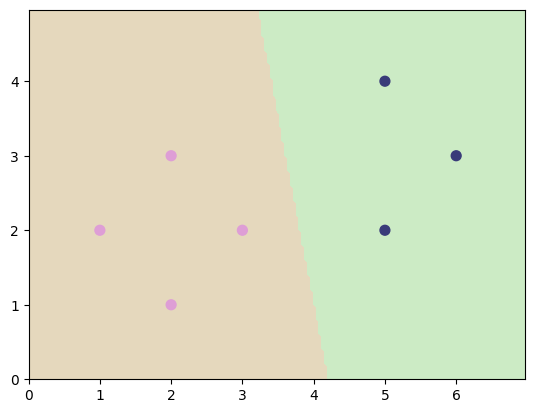

In [112]:
# Vaš kôd ovdje
clf = RidgeClassifier(alpha=0).fit(seven_X, seven_y)
plot_2d_clf_problem(seven_X, seven_y,lambda x:clf.predict(x)>=0.5)
print(accuracy_score(seven_y,clf.predict(seven_X)))


Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

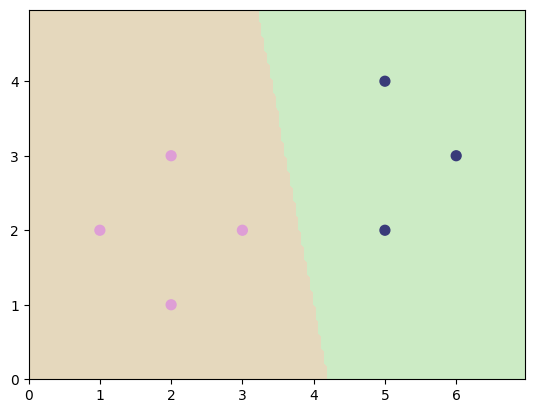

In [113]:
# Vaš kôd ovdje
model = LinearRegression().fit(seven_X,seven_y)
plot_2d_clf_problem(seven_X,seven_y, lambda x:model.predict(x)>=0.5)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

### (b)  

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [114]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

0.875


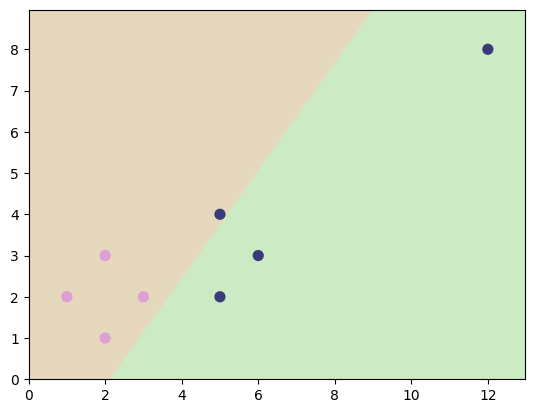

In [115]:
# Vaš kôd ovdje
clf = RidgeClassifier(alpha=0).fit(outlier_X, outlier_y)
plot_2d_clf_problem(outlier_X, outlier_y,lambda x:clf.predict(x)>=0.5)
print(accuracy_score(outlier_y,clf.predict(outlier_X)))

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

### (c)  

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [116]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

0.875


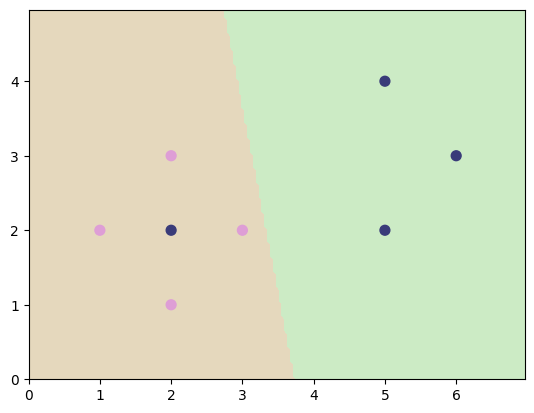

In [117]:
# Vaš kôd ovdje
clf = RidgeClassifier(alpha=0).fit(unsep_X, unsep_y)
plot_2d_clf_problem(unsep_X, unsep_y,lambda x:clf.predict(x)>=0.5)
print(accuracy_score(unsep_y,clf.predict(unsep_X)))

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

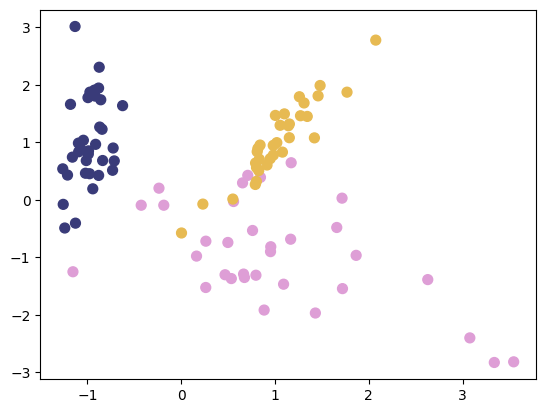

In [118]:
from sklearn.datasets import make_classification
# Vaš kôd ovdje
X,y = make_classification(n_samples=100, n_features=2, n_informative=2,n_redundant=0,n_classes=3,n_clusters_per_class=1)
plot_2d_clf_problem(X,y)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

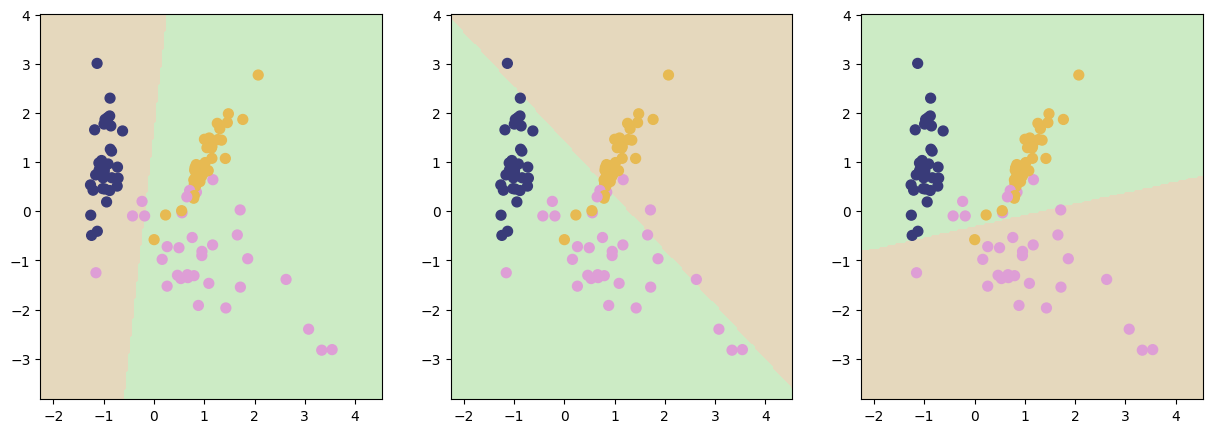

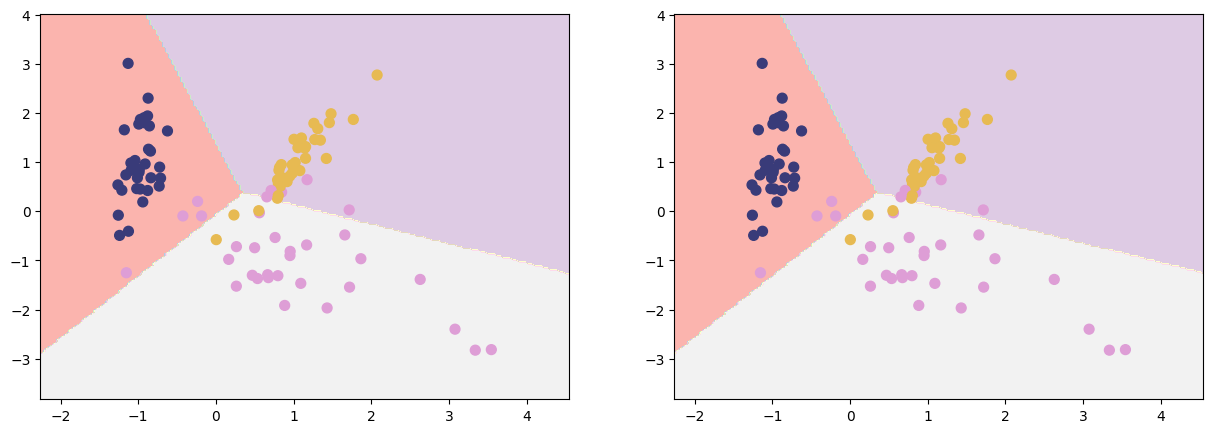

In [119]:
#Vaš kôd ovdje
h_i = []

def predict(x):
    predictions = [hi(x) for hi in h_i]
    return np.argmax(predictions)

y_i=[[] for _ in range(3)]
for klasa in y:
    for i in range(3):
        y_i[i].append(1 if klasa == i else 0)
        
plt.figure(figsize=(15, 5))
for i in range(3):
    lin_reg = LinearRegression().fit(X, y_i[i])

    h_i.append(lambda x, model=lin_reg: model.predict(x.reshape(1, -1)) )
    plt.subplot(1, 3, i+1)
    plot_2d_clf_problem(X, y, lambda x : h_i[i](x) >=0.5)
    
plt.figure(figsize=(15, 5))

h_argmax = lambda x: predict(x)

plt.subplot(1,2,1)
plot_2d_clf_problem(X, y, h_argmax)

plt.subplot(1, 2, 2)
clf = RidgeClassifier().fit(X,y)
plot_2d_clf_problem(X,y, lambda x: clf.predict(x) )
    

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

### (a)  

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

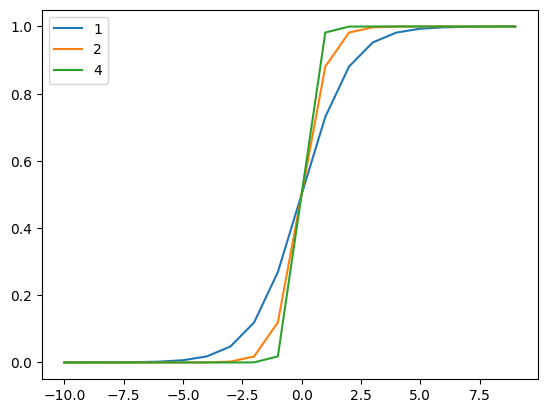

In [120]:
# Vaš kôd ovdje
import math
def sigm(a,x):
    return 1 / (1+ math.exp(-a * x))

Xsigm = [i for i in range(-10,10)]
a_s = [1,2,4]
for a in a_s:
    y = [sigm(a,x) for x in Xsigm]
    plt.plot(Xsigm, y)
    plt.legend([1,2,4])

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

### (b) 

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [121]:
from numpy import linalg
from sklearn.preprocessing import PolynomialFeatures
def lr_h(xi,w):
    if xi.size == len(w)-1:
        xi = np.insert(xi,0,1)
    mul = np.dot(w.T , xi)
    return 1/ (1+np.exp(-mul))

def cross_entrophy_error(X,y,w):
    X = PolynomialFeatures(1).fit_transform(X)
    e = 0
    n = y.size
    for i in range(n):
        h = lr_h(X[i], w)
        e+= ( -y[i] * math.log(h) -
              (1-y[i]) * math.log(1 - h) )
    return e / n
        
def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    
    
    X = PolynomialFeatures(1).fit_transform(X)
    dim = X[0].size
    n = y.size
    w = np.zeros(dim)
    error_last = cross_entrophy_error(seven_X,seven_y,w)
    trace_list = []
    for _ in range(max_iter):
        if trace:
            trace_list.append(w.copy())
        delta_w = np.zeros(dim)
        error = 0
        for i in range(n) :
            h = lr_h(X[i],w)
            delta_w = delta_w -(h-y[i]) * X[i]
            
            #error += -y[i] * np.log(h) - (1 - y[i]) * np.log(1 - h)
        
        w[0] = w[0] + eta * delta_w[0]
        w[1:] = w[1:]*(1-eta*alpha) + eta * delta_w[1:]
        
        error = cross_entrophy_error(seven_X,seven_y,w)
        if np.abs(error_last - error) < epsilon:
            break
        error_last = error
    if trace: 
        trace_list.append(w)
        return trace_list
    return w

### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

In [122]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

[ 4.45449454 -1.71089242  0.68413507]
0.13521872720206746


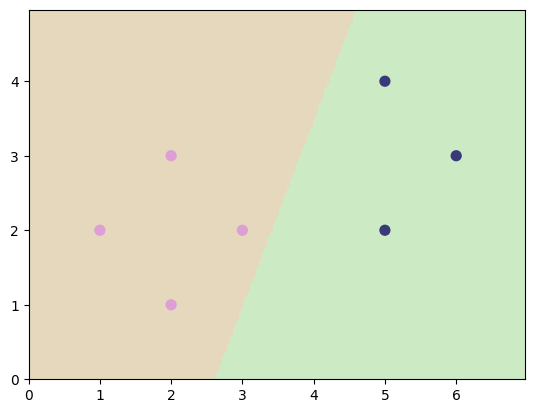

In [123]:
# Vaš kôd ovdje
w = lr_train(X = seven_X,y = seven_y,)
print(w)
print(cross_entrophy_error(seven_X,seven_y,w))
h_x = lambda x: lr_h(x,w) >=0.5
plot_2d_clf_problem(seven_X,seven_y,h_x)

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [124]:
from sklearn.metrics import zero_one_loss

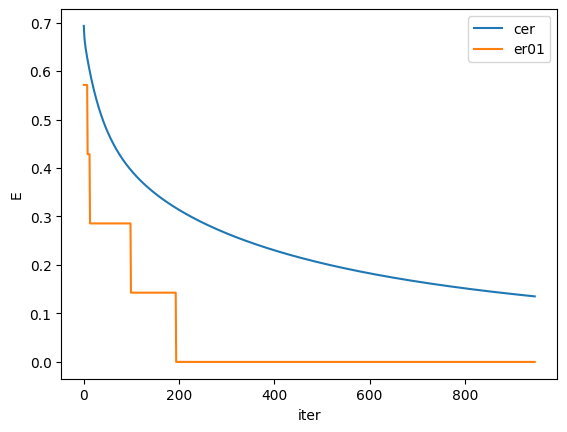

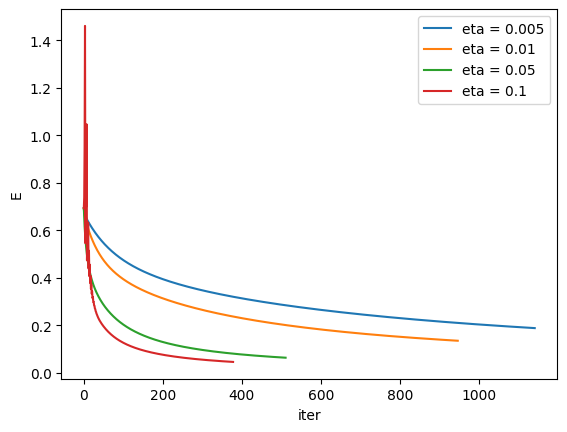

In [125]:
# Vaš kôd ovdje
trace = lr_train(X = seven_X,y = seven_y, trace=True)

cer = []
er0_1 = np.zeros(len(trace))

etas = [0.005,0.01,0.05,0.1]
cer_etas = [[] for _ in range(4)]

for k,wi in enumerate(trace):
    cer.append(cross_entrophy_error(seven_X,seven_y,wi))
    for i in range(len(seven_X)):
        if lr_h(seven_X[i], wi) > 0.5 and seven_y[i] ==0 or lr_h(seven_X[i], wi) <= 0.5 and seven_y[i] ==1 :
            er0_1[k] += 1
er0_1 /= len(seven_y)

for i,eta in enumerate(etas):
    trace = lr_train(X = seven_X,y = seven_y, trace=True,eta = eta)
    for wi in trace:
        cer_etas[i].append(cross_entrophy_error(seven_X,seven_y,wi))
    

plt.plot(cer)
plt.plot(er0_1)
plt.legend(["cer","er01"]) ,  plt.xlabel('iter'), plt.ylabel('E');
plt.show()

l=[]
for i in range(len(etas)):
    plt.plot( cer_etas[i])
    l.append("eta = "+str(etas[i]))
plt.legend(l) 
plt.xlabel('iter'), plt.ylabel('E');
plt.show()





**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

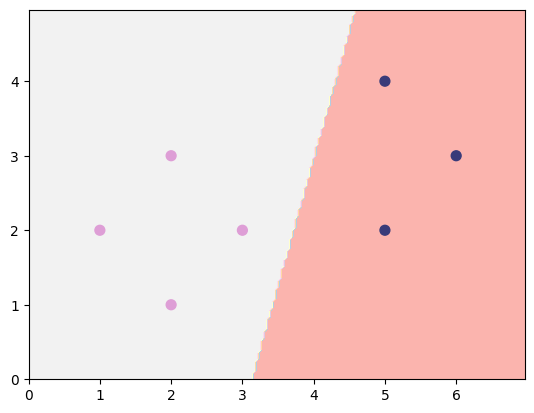

In [126]:
from sklearn.linear_model import LogisticRegression

# Vaš kôd ovdje C = alpha ali obrnuto
log_reg = LogisticRegression(max_iter=2000,tol=0.0001,C=10**10)
log_reg.fit(seven_X,seven_y)

h = lambda x: log_reg.predict(x)
plot_2d_clf_problem(seven_X,seven_y,h)

### 4. Analiza logističke regresije

### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier`. Prikažite granicu između klasa.

In [127]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

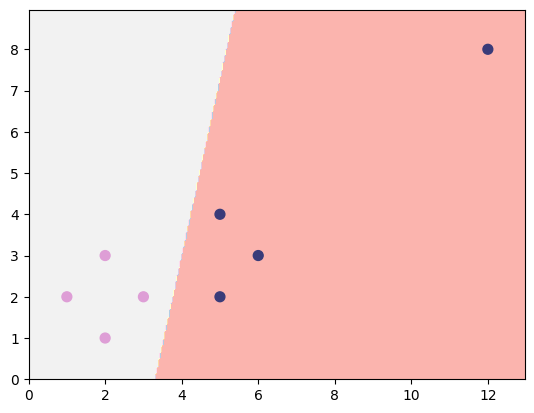

In [128]:
# Vaš kôd ovdje
log_reg = LogisticRegression(max_iter=2000,tol=0.0001,C=10**10)
log_reg.fit(outlier_X,outlier_y)
h = lambda x: log_reg.predict(x)
plot_2d_clf_problem(outlier_X,outlier_y,h)

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.

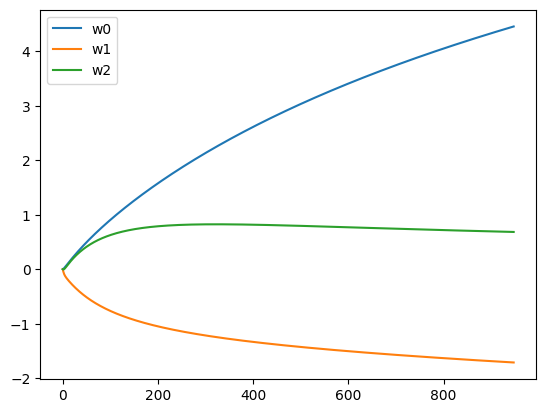

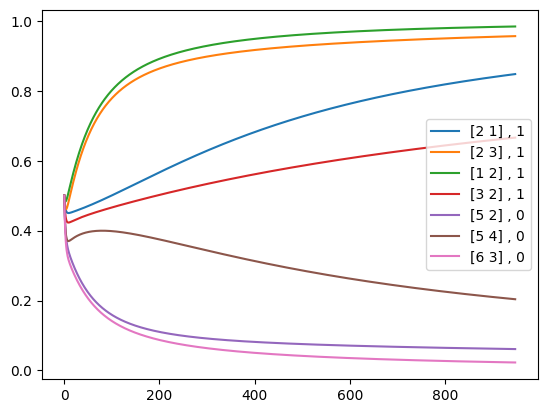

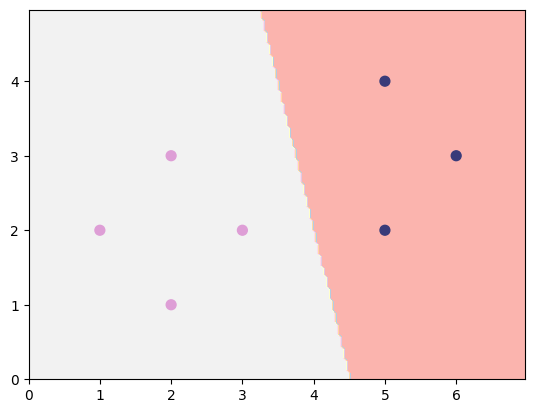

In [129]:
# Vaš kôd ovdje
trace = lr_train(seven_X,seven_y,trace=True)

ws = [[] for _ in range(3)]
hxs = [[] for _ in range(7)]

for wi in trace:
    for i in range(len(ws)):
        ws[i].append(wi[i])
    for i in range(len(hxs)):
        hxs[i].append(lr_h(seven_X[i],wi))


for i in range(len(ws)):
    plt.plot(ws[i])
plt.legend(["w0","w1","w2"])
plt.show()

for i in range(len(hxs)):
    plt.plot(hxs[i], label = str(seven_X[i]) + " , "+ str(seven_y[i]))
plt.legend()
plt.show()

log_reg = LogisticRegression(max_iter=2000,tol=0.0001,)
log_reg.fit( seven_X,seven_y)
h = lambda x: log_reg.predict(x)
plot_2d_clf_problem(seven_X,seven_y,h)


### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep`.

In [130]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

0.3876977182948462


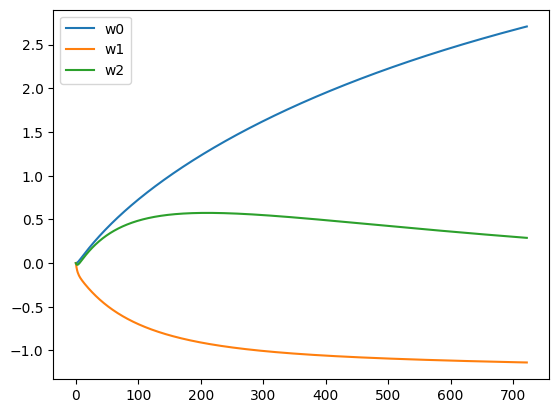

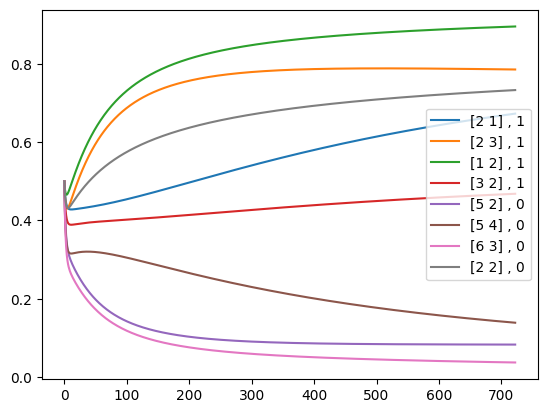

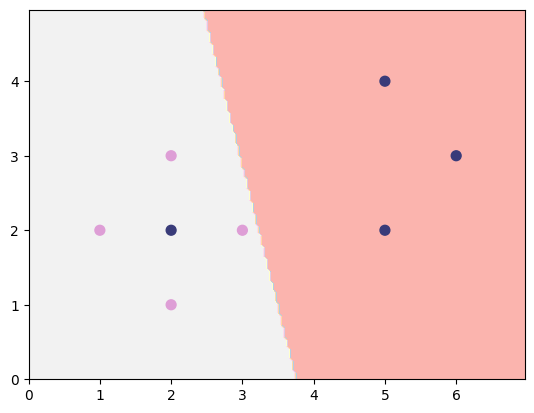

In [131]:
# Vaš kôd ovdje
trace = lr_train(unsep_X,unsep_y,trace=True)

print(cross_entrophy_error(unsep_X,unsep_y,trace[-1]))
ws = [[] for _ in range(3)]
hxs = [[] for _ in range(8)]

for wi in trace:
    for i in range(len(ws)):
        ws[i].append(wi[i])
    for i in range(len(hxs)):
        hxs[i].append(lr_h(unsep_X[i],wi))
        
for i in range(len(ws)):
    plt.plot(ws[i])
plt.legend(["w0","w1","w2"])
plt.show()

for i in range(len(hxs)):
    plt.plot(hxs[i], label = str(unsep_X[i]) + " , "+ str(unsep_y[i]))
plt.legend()
plt.show()

log_reg = LogisticRegression(max_iter=2000,tol=0.0001,)
log_reg.fit(unsep_X,unsep_y)
h = lambda x: log_reg.predict(x)
plot_2d_clf_problem(unsep_X,unsep_y,h)

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

In [132]:
from numpy.linalg import norm

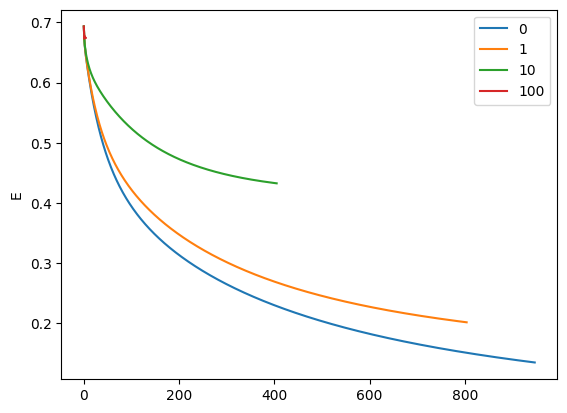

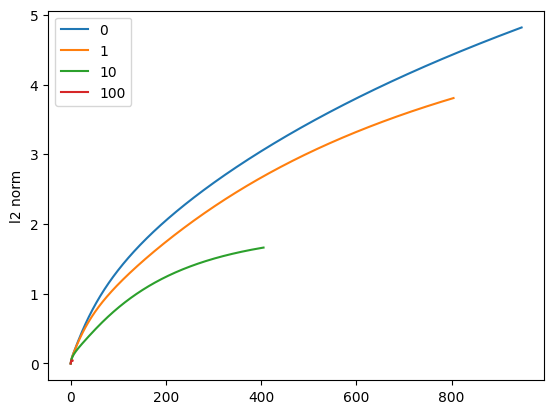

In [133]:
# Vaš kôd ovdje

a_s = [0,1,10,100]
l2_alphas = [[] for _ in range(len(a_s))]
cer_alphas = [[] for _ in range(len(a_s))]

for i,a in enumerate(a_s):
    trace = lr_train(seven_X,seven_y,trace= True,alpha=a)
    for w in trace:
        cer_alphas[i].append(cross_entrophy_error(seven_X,seven_y,w))
        l2_alphas[i].append(np.sqrt(np.dot(np.transpose(w), w)))

for i in range(len(a_s)):
    plt.plot(cer_alphas[i], label = a_s[i])
plt.legend(); plt.ylabel("E"); plt.show()
for i in range(len(a_s)):
    plt.plot(l2_alphas[i], label = a_s[i])
plt.legend();plt.ylabel("l2 norm"); plt.show()

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [134]:
from sklearn.preprocessing import PolynomialFeatures

#plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))


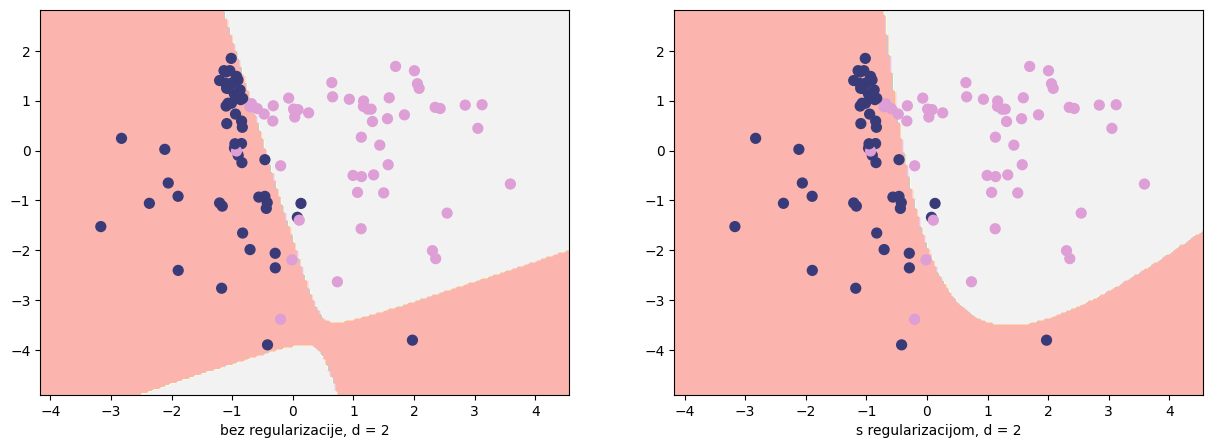

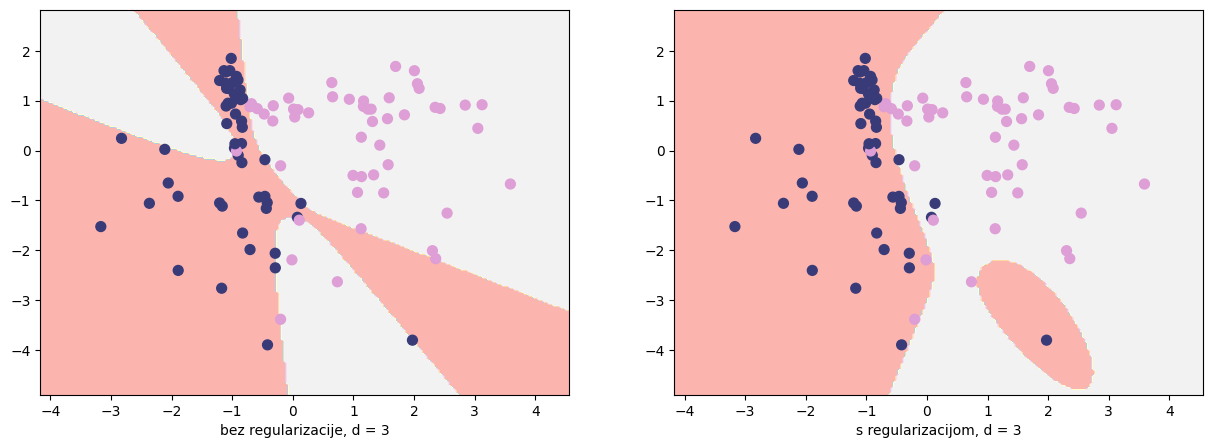

In [135]:
from sklearn.datasets import make_classification

# Vaš kôd ovdje
X,y = make_classification(100,n_clusters_per_class=2, n_features=2,n_redundant=0)
ds = [2,3]

for d in ds:
    poly = PolynomialFeatures(d)
    fi = poly.fit_transform(X)
    model1 = LogisticRegression(C=10**10, max_iter=5000)
    model2 = LogisticRegression(C=1, max_iter=5000)
    model1.fit(fi,y)
    model2.fit(fi,y)
    
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plot_2d_clf_problem(X, y, lambda x : model1.predict(poly.transform(x) ) )
    plt.xlabel("bez regularizacije, d = " + str(d))
    
    plt.subplot(1,2,2)
    plot_2d_clf_problem(X, y, lambda x : model2.predict(poly.transform(x) ) )
    plt.xlabel("s regularizacijom, d = "+ str(d))
    plt.show()

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?